# Using logistic regression to classify

- when the data is highly imbalanced

## my toolkit

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

## get data

In [2]:
df=pd.read_csv('strokes_data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## initial EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## initial cleaning steps

- deal with nulls
- drop any useless columns
- identify if any duplicates and then drop as needed

- try to retain as many minority class as possible

### fill Nulls

fill null methods - in this case the point is to retain as much data as possible
- fill null smoker status with 'unknown'
- fill null bmi with median bmi of whole data set

In [7]:
df['smoking_status']=df['smoking_status'].fillna("Unknown")
med=df['bmi'].median()
df['bmi']=df['bmi'].fillna(med)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### useless columns

In [9]:
df=df.drop(['id'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


### duplicates

In [11]:
df=df.drop_duplicates()
#there are none in this df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


## EDA

- review  columns: distribution, counts, correlation

## Preprocessing

- encode categories
- scale numerics

In [13]:
y=df['stroke']
X=df.drop('stroke',axis=1)
X_num=X.select_dtypes(include=np.number)
X_cat=X.select_dtypes(include=object)

In [14]:
X_num.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,3.0,0,0,95.12,18.0


In [15]:
X_cat.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,Unknown


In [16]:
y.head(1)

0    0
Name: stroke, dtype: int64

In [17]:
X_cat_dummies=pd.get_dummies(X_cat, drop_first=True)

In [18]:
X_cat_dummies_2=pd.get_dummies(X_cat)

In [19]:
X_cat_dummies.head(1) # usually is dropped the first.. dummies trap

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0,0,0,0,1,0,0,0,0


In [20]:
X_cat_dummies_2.head(1)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0


### Scaler

In [21]:
scaler= RobustScaler()
scaler.fit(X_num)
X_num_scaled= pd.DataFrame(scaler.transform(X_num),columns=X_num.columns)

### Bring back together, concat

In [22]:
X_full=pd.concat([X_cat_dummies,X_num_scaled], axis=1)

In [23]:
X_full.shape

(43400, 16)

In [24]:
y.shape

(43400,)

In [25]:
X_full.head(1)

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,0,0,0,0,1,0,0,0,0,-1.138889,0.0,0.0,0.10252,-1.054348


## Train Test split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X_full,y,test_size=0.45,random_state=40)

## Define Model - logistic regression to classify

In [27]:
classification= LogisticRegression(max_iter=500)

In [28]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [29]:
y_test_pred=classification.predict(X_test)

In [30]:
accuracy_score(y_test,y_test_pred)

0.9820276497695852

## assessing the accuracy of our classification model

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [32]:
confusion_matrix(y_test,y_test_pred)

array([[19179,     0],
       [  351,     0]], dtype=int64)

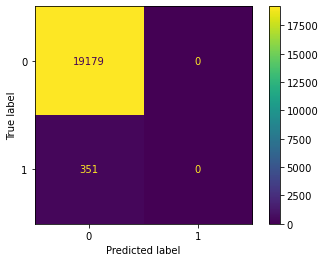

In [33]:
# larger
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot()

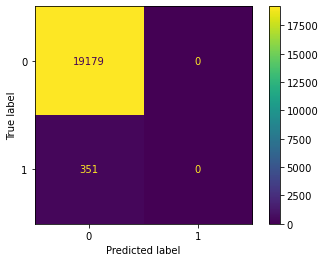

In [34]:
# easier:
plot_confusion_matrix(classification,X_test, y_test)

# What can we do?

- fit model to more balanced data
- increase/decrase test_size
- try a different model
- tweak the hiper parameters on log regression
- change the treshold for likehood of stroke
- forget machine learning - go back to data visualization and inference
- forget predictions, focus on feature importance
- work with features - create new ones, get more data, clea the data

## Resampling techniques

### Random Under Sample

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
X_full.shape

(43400, 16)

In [49]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [50]:
rus=RandomUnderSampler()
# do we resample the TRAIN data 
# or 
# do we resample df // maybe its easier resample all df in this case

# not needed -X_full_incl_y= pd.concat([X_full,y], axis=1)
X_rus,y_rus=rus.fit_resample(X_full,y)

In [51]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [52]:
y_rus.value_counts()

0    783
1    783
Name: stroke, dtype: int64

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X_full,y)

In [55]:
y.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [56]:
y_ros.value_counts()

0    42617
1    42617
Name: stroke, dtype: int64

### try model with rus and ros

In [67]:
#Train Test split
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.45,random_state=40)
classification= LogisticRegression(max_iter=500)
classification.fit(X_train_rus,y_train_rus)
y_test_pred_rus=classification.predict(X_test_rus)
accuracy_score(y_test_rus,y_test_pred_rus)

0.7375886524822695

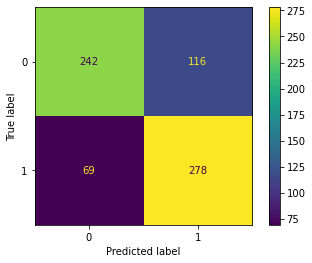

In [68]:
plot_confusion_matrix(classification,X_test_rus, y_test_rus)

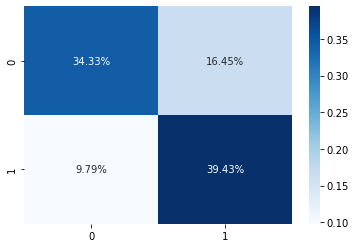

In [73]:
cmx_rus=confusion_matrix(y_test_rus,y_test_pred_rus)
sns.heatmap(cmx_rus/np.sum(cmx_rus), annot=True, fmt='.2%', cmap='Blues');

In [69]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.45,random_state=40)
classification= LogisticRegression(max_iter=500)
classification.fit(X_train_ros,y_train_ros)
y_test_pred_ros=classification.predict(X_test_ros)
accuracy_score(y_test_ros,y_test_pred_ros)

0.7803733444571905

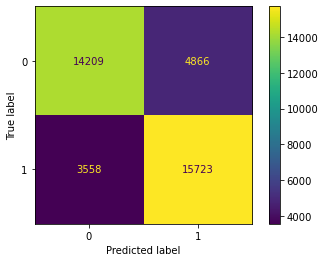

In [70]:
plot_confusion_matrix(classification,X_test_ros, y_test_ros)

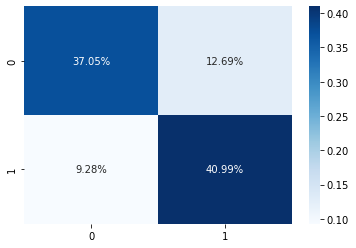

In [72]:
cmx_ros=confusion_matrix(y_test_ros,y_test_pred_ros)
sns.heatmap(cmx_ros/np.sum(cmx_ros), annot=True, fmt='.2%', cmap='Blues');

# Correlating categories
- use corr matrix heatmap for numbers
- and scatter plots of two num features
- tip - duplicate your binary y label into a numeric field first
- this will include y in your correlation matrix

- use chi square or VIF or randomforest_featureselection() for categories

## Chi squared

- cross tabulate the incidences of each categories
- start with a pair of features
- something you think will be correlated?
- work out chi squared statistic

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.0+ MB


In [77]:
# work type and residence type (should be categorical)
feat_crosstab=pd.crosstab(df['work_type'], df['Residence_type'], margins=False)
feat_crosstab

Residence_type,Rural,Urban
work_type,,
Govt_job,2714,2726
Never_worked,84,93
Private,12320,12514
Self-employed,3444,3349
children,3082,3074


* HO = null hypothesis, there is no dependency, or relationship - theres not evidence to support my hypothesis - there is no corr between these features
* HA = alternative hypothesis - there is corr between these features

In [79]:
from scipy.stats import chi2_contingency
chi2_contingency(feat_crosstab, correction=False)

(3.0495585904185893,
 0.5495664171321049,
 4,
 array([[ 2712.98064516,  2727.01935484],
        [   88.2716129 ,    88.7283871 ],
        [12384.95612903, 12449.04387097],
        [ 3387.73483871,  3405.26516129],
        [ 3070.05677419,  3085.94322581]]))

- p value > 0.05 - means no correlation 
- so we accept the null hypothesis - we have no evidence to drop either feature

# AUC - area under the curve

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

In [82]:
y_pred_probs=classification.predict_proba(X_test_ros)[::,1]

In [83]:
y_pred_probs

array([0.76078319, 0.85588198, 0.05147577, ..., 0.55276854, 0.11995842,
       0.79972517])

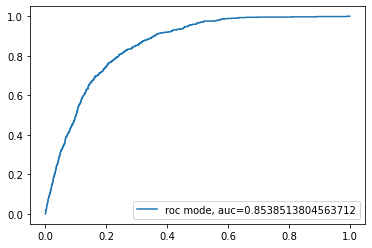

In [89]:
fpr,tpr, _ = roc_curve(y_test_ros,y_pred_probs)
auc=roc_auc_score(y_test_ros,y_pred_probs)
plt.plot(fpr,tpr,label='roc mode, auc='+str(auc))
plt.legend(loc=4)
plt.show();

In [90]:
y_pred_raw_probs=classification.predict_proba(X_test)[::,1]

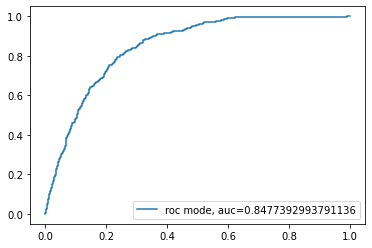

In [91]:
fpr,tpr, _ = roc_curve(y_test,y_pred_raw_probs)
auc=roc_auc_score(y_test,y_pred_raw_probs)
plt.plot(fpr,tpr,label='roc mode, auc='+str(auc))
plt.legend(loc=4)
plt.show();